/home/svillhauer/.local/lib/python3.10/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


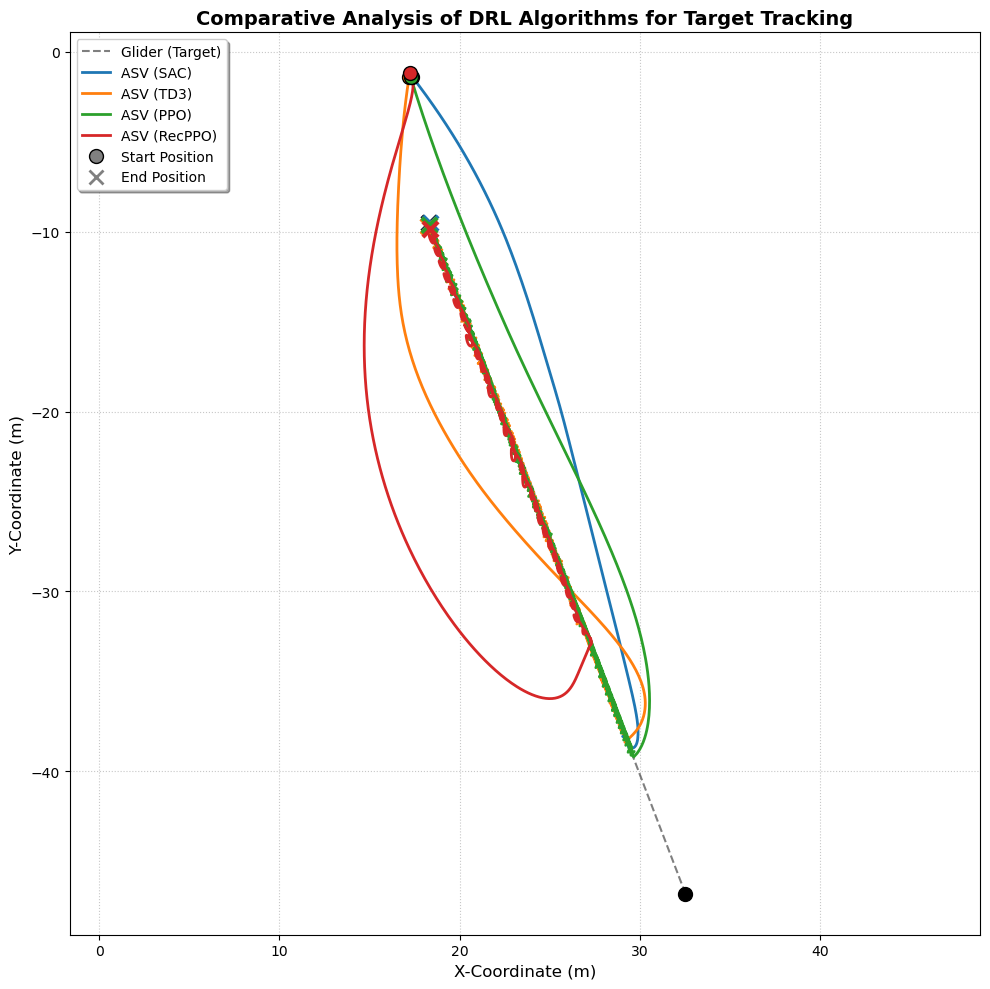

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import SAC, PPO, TD3
from sb3_contrib import RecurrentPPO
from asv_glider_bearing_dist_env import AsvGliderBearingEnv

# --- 1. Dictionary of best models (Updated Paths) ---
# This matches the folder structure: ./experiments/{algo}/best_model/best_model.zip
models = {
    "SAC": (SAC, "./experiments/sac/best_model/best_model.zip"),
    "TD3": (TD3, "./experiments/td3/best_model/best_model.zip"),
    "PPO": (PPO, "./experiments/ppo/best_model/best_model.zip"),
    "RecPPO": (RecurrentPPO, "./experiments/rec_ppo/best_model/best_model.zip")
}

plt.figure(figsize=(10, 10))
test_env = AsvGliderBearingEnv()
common_seed = 99
glider_path_plotted = False

# --- 2. Evaluate and Plot each Agent ---
for name, (algo_class, path) in models.items():
    if not os.path.exists(path):
        print(f"Skipping {name}: Path not found at {path}")
        continue
    
    # Load the trained agent
    model = algo_class.load(path)
    obs, _ = test_env.reset(seed=common_seed) 
    
    asv_history = []
    glider_history = []
    done = False
    lstm_states = None 
    
    while not done:
        # Predict action
        action, lstm_states = model.predict(obs, state=lstm_states, deterministic=True)
        obs, _, terminated, truncated, _ = test_env.step(action)
        
        # Log positions
        asv_history.append(test_env.unwrapped.asv_pos.copy())
        glider_history.append(test_env.unwrapped.glider_pos.copy())
        
        done = terminated or truncated
    
    asv_history = np.array(asv_history)
    glider_history = np.array(glider_history)
    
    # Plot the ASV trajectory
    line = plt.plot(asv_history[:, 0], asv_history[:, 1], label=f"ASV ({name})", linewidth=2)
    color = line[0].get_color()
    
    # Mark Start (Circle) and Stop (X) for ASV
    plt.scatter(asv_history[0, 0], asv_history[0, 1], color=color, marker='o', s=100, edgecolors='black', zorder=5)
    plt.scatter(asv_history[-1, 0], asv_history[-1, 1], color=color, marker='x', s=120, linewidths=3, zorder=5)

    # Plot Glider path only once (it's the same for all agents due to common_seed)
    if not glider_path_plotted:
        plt.plot(glider_history[:, 0], glider_history[:, 1], 'k--', label="Glider (Target)", alpha=0.5)
        plt.scatter(glider_history[0, 0], glider_history[0, 1], color='black', marker='o', s=100)
        plt.scatter(glider_history[-1, 0], glider_history[-1, 1], color='black', marker='x', s=120, linewidths=3)
        glider_path_plotted = True

# --- 3. Professional Formatting for Paper ---
plt.title("Comparative Analysis of DRL Algorithms for Target Tracking", fontsize=14, fontweight='bold')
plt.xlabel("X-Coordinate (m)", fontsize=12)
plt.ylabel("Y-Coordinate (m)", fontsize=12)

# --- 4. Custom Legend Ordering ---
handles, labels = plt.gca().get_legend_handles_labels()

# Find the index of the Glider in the current labels
try:
    glider_idx = labels.index("Glider (Target)")
    # Pop it out and insert it at the beginning
    glider_handle = handles.pop(glider_idx)
    glider_label = labels.pop(glider_idx)
    handles.insert(0, glider_handle)
    labels.insert(0, glider_label)
except ValueError:
    pass # Glider label not found

# Create the Start/End markers for the legend
from matplotlib.lines import Line2D
marker_elements = [
    Line2D([0], [0], marker='o', color='w', label='Start Position', 
           markerfacecolor='gray', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='x', color='gray', label='End Position', 
           markersize=10, linestyle='None', markeredgewidth=2)
]

# Combine reordered handles with the new markers
plt.legend(handles=handles + marker_elements, loc='upper left', frameon=True, shadow=True)

plt.grid(True, linestyle=':', alpha=0.7)
plt.axis('equal') 
plt.tight_layout()

# Save for paper
plt.savefig("trajectory_comparison_highres.pdf", dpi=300)
plt.show()

/home/svillhauer/.local/lib/python3.10/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


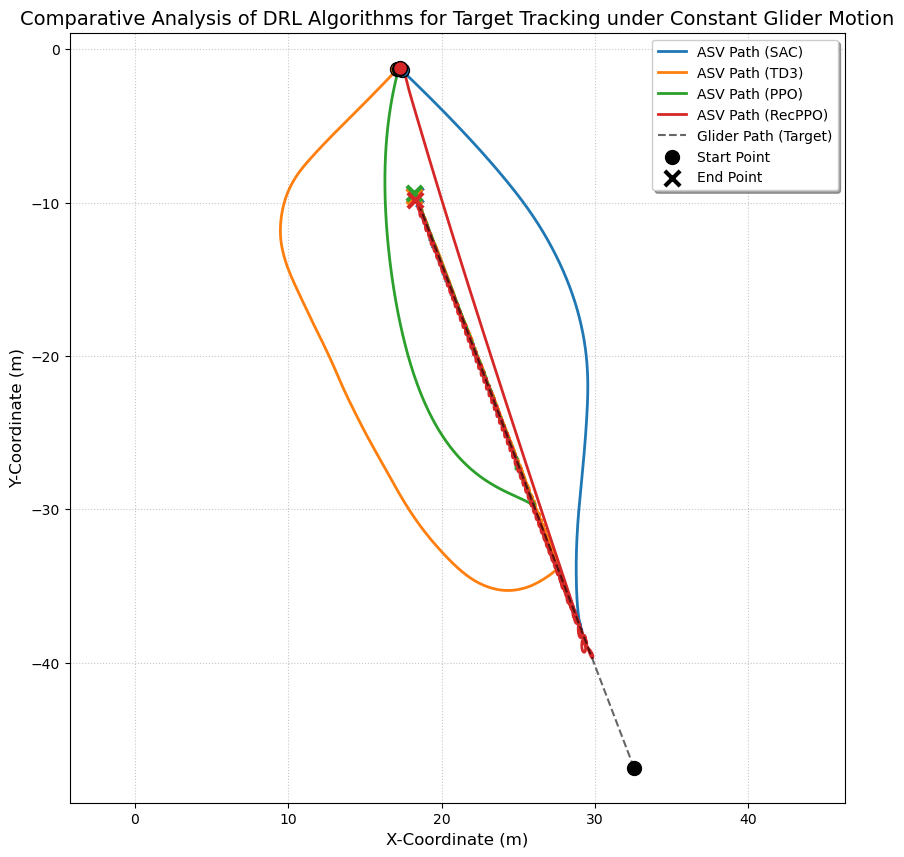

In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from stable_baselines3 import SAC, PPO, TD3
# from sb3_contrib import RecurrentPPO
# from asv_glider_bearing_dist_env import AsvGliderBearingEnv

# # --- 1. Dictionary of best models ---
# models = {
#     "SAC": (SAC, "./logs_sac/best_model/best_model.zip"),
#     "TD3": (TD3, "./logs_td3/best_model/best_model.zip"),
#     "PPO": (PPO, "./logs_ppo/best_model/best_model.zip"),
#     "RecPPO": (RecurrentPPO, "./logs_rec_ppo/best_model/best_model.zip")
# }

# plt.figure(figsize=(10, 10))
# test_env = AsvGliderBearingEnv()
# common_seed = 99

# # --- 2. Evaluate and Plot each Agent ---
# for name, (algo_class, path) in models.items():
#     if not os.path.exists(path):
#         print(f"Skipping {name}: Path not found.")
#         continue
    
#     model = algo_class.load(path)
#     obs, _ = test_env.reset(seed=common_seed) 
    
#     history = []
#     done = False
#     lstm_states = None 
    
#     while not done:
#         action, lstm_states = model.predict(obs, state=lstm_states, deterministic=True)
#         obs, _, terminated, truncated, _ = test_env.step(action)
#         history.append(test_env.unwrapped.asv_pos.copy())
#         done = terminated or truncated
    
#     history = np.array(history)
    
#     # Plot the full trajectory line
#     line = plt.plot(history[:, 0], history[:, 1], label=f"ASV Path ({name})", linewidth=2)
#     color = line[0].get_color() # Get color to match markers to the line
    
#     # Mark Start (Circle) and Stop (X)
#     plt.scatter(history[0, 0], history[0, 1], color=color, marker='o', s=100, edgecolors='black', zorder=5)
#     plt.scatter(history[-1, 0], history[-1, 1], color=color, marker='x', s=120, linewidths=3, zorder=5)

# # --- 3. Plot the Target (Glider) Trajectory ---
# obs, _ = test_env.reset(seed=common_seed)
# glider_history = []
# # Re-run enough steps to cover the longest ASV path
# for _ in range(2000): 
#     glider_history.append(test_env.unwrapped.glider_pos.copy())
#     _, _, terminated, truncated, _ = test_env.step(test_env.action_space.sample())
#     if terminated or truncated: break

# glider_history = np.array(glider_history)

# plt.plot(glider_history[:, 0], glider_history[:, 1], 'k--', label="Glider Path (Target)", alpha=0.6)
# plt.scatter(glider_history[0, 0], glider_history[0, 1], color='black', marker='o', s=100, label='Start Point')
# plt.scatter(glider_history[-1, 0], glider_history[-1, 1], color='black', marker='x', s=120, linewidths=3, label='End Point')

# # --- 4. Formal Formatting for Paper ---
# plt.title("Comparative Analysis of DRL Algorithms for Target Tracking under Constant Glider Motion", fontsize=14)
# plt.xlabel("X-Coordinate (m)", fontsize=12)
# plt.ylabel("Y-Coordinate (m)", fontsize=12)
# plt.legend(loc='best', frameon=True, shadow=True)
# plt.grid(True, linestyle=':', alpha=0.7)
# plt.axis('equal') # Ensures 1m on X-axis equals 1m on Y-axis

# plt.show()

/home/svillhauer/.local/lib/python3.10/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


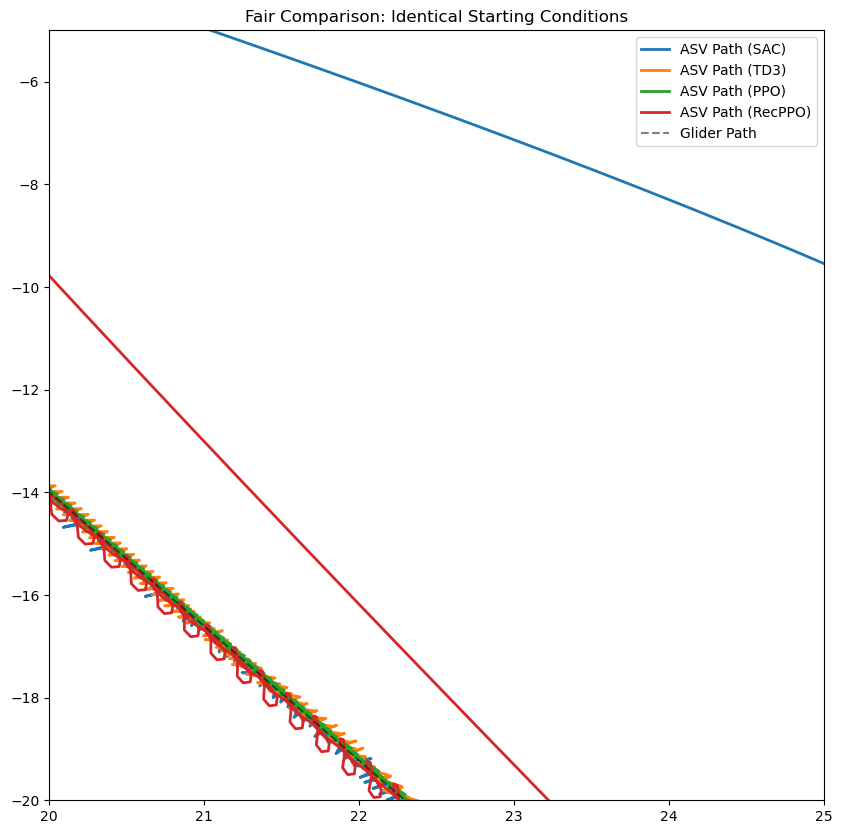

In [16]:
from stable_baselines3 import SAC, PPO, TD3
from sb3_contrib import RecurrentPPO
import matplotlib.pyplot as plt
from asv_glider_bearing_dist_env import AsvGliderBearingEnv
import os
import numpy as np

# 1. Dictionary of your best models
models = {
    "SAC": (SAC, "./logs_sac/best_model/best_model.zip"),
    "TD3": (TD3, "./logs_td3/best_model/best_model.zip"),
    "PPO": (PPO, "./logs_ppo/best_model/best_model.zip"),
    "RecPPO": (RecurrentPPO, "./logs_rec_ppo/best_model/best_model.zip")
}

plt.figure(figsize=(10, 10))
test_env = AsvGliderBearingEnv()

for name, (algo_class, path) in models.items():
    if not os.path.exists(path): continue
    
    model = algo_class.load(path)
    # FIX: Use the SAME seed for every single algorithm!
    obs, _ = test_env.reset(seed=99) 
    
    history = []
    done = False
    lstm_states = None # Only used by RecPPO
    
    while not done:
        # Generic prediction handles both standard and recurrent models
        action, lstm_states = model.predict(obs, state=lstm_states, deterministic=True)
        obs, _, terminated, truncated, _ = test_env.step(action)
        history.append(test_env.unwrapped.asv_pos.copy())
        done = terminated or truncated
    
    history = np.array(history)
    plt.plot(history[:, 0], history[:, 1], label=f"ASV Path ({name})", linewidth=2)

# Plot the glider once (it will be the same because of the seed)
obs, _ = test_env.reset(seed=99)
glider_history = []
for _ in range(len(history)): # Approximate length
    glider_history.append(test_env.unwrapped.glider_pos.copy())
    test_env.step(test_env.action_space.sample()) # Glider moves regardless of action
glider_history = np.array(glider_history)

# Zoom in on a 100m x 100m area (adjust numbers based on your env scale)
plt.xlim(20, 25)
plt.ylim(-20, -5)
plt.plot(glider_history[:, 0], glider_history[:, 1], 'k--', label="Glider Path", alpha=0.5)
plt.legend()
plt.title("Fair Comparison: Identical Starting Conditions")
plt.show()

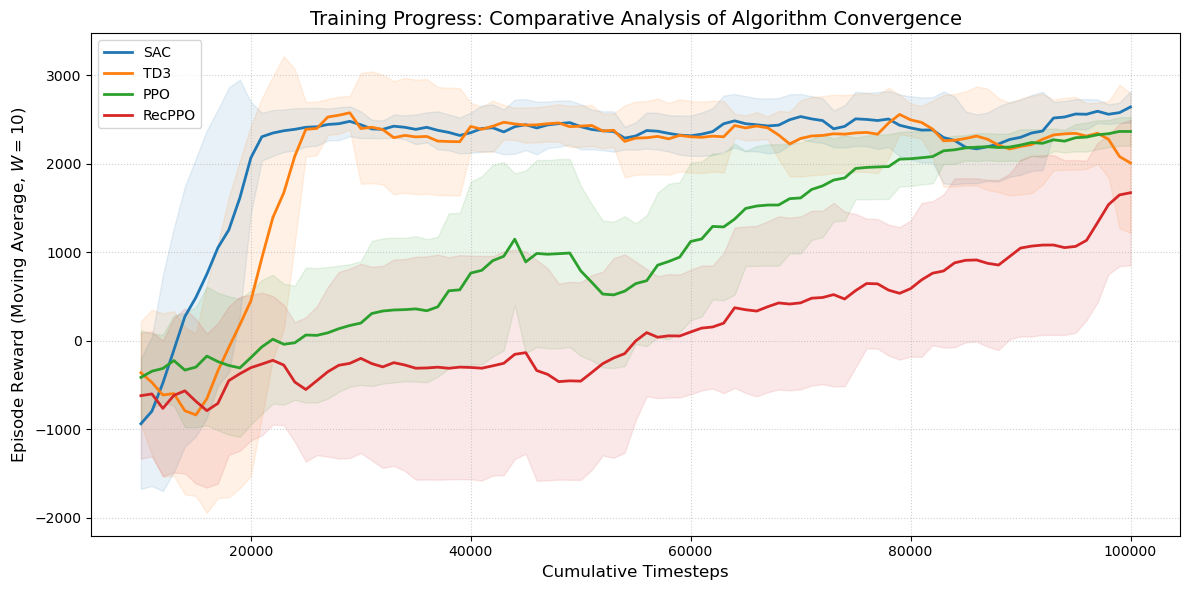

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_training_comparison(log_files, window=20):
    plt.figure(figsize=(12, 6))
    found_any = False
    
    for label, file_path in log_files.items():
        if os.path.exists(file_path):
            try:
                # 1. Load CSV (Skip header)
                df = pd.read_csv(file_path, skiprows=1)
                
                # 2. Extract Data
                rewards = df['r'].to_numpy()
                steps = df['l'].to_numpy()
                cumulative_steps = np.cumsum(steps)
                
                # 3. Smoothing Logic
                if len(rewards) >= window:
                    # Moving average
                    y_smoothed = np.convolve(rewards, np.ones(window)/window, mode='valid')
                    
                    # Rolling Standard Deviation for shaded area
                    r_series = pd.Series(rewards)
                    std_smoothed = r_series.rolling(window=window).std().to_numpy()[window-1:]
                    
                    x_axis = cumulative_steps[window-1:]
                    
                    line = plt.plot(x_axis, y_smoothed, label=label, linewidth=2)
                    plt.fill_between(x_axis, y_smoothed - std_smoothed, 
                                     y_smoothed + std_smoothed, 
                                     color=line[0].get_color(), alpha=0.1)
                else:
                    plt.plot(cumulative_steps, rewards, label=label, linewidth=2)
                
                found_any = True
            except Exception as e:
                print(f"Error loading {label}: {e}")
        else:
            print(f"File not found: {file_path}")

    if not found_any:
        print("Search failed. Ensure the paths in 'folders' match your files exactly.")
        return

    # Professional Paper Styling
    plt.title("Training Progress: Comparative Analysis of Algorithm Convergence", fontsize=14)
    plt.xlabel("Cumulative Timesteps", fontsize=12)
    plt.ylabel(f"Episode Reward (Moving Average, $W={window}$)", fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

# --- UPDATE THESE TO THE EXACT PATHS ON YOUR COMPUTER ---
folders = {
    "SAC": "./experiments/sac/training_logs.monitor.csv", 
    "TD3": "./experiments/td3/training_logs.monitor.csv",
    "PPO": "./experiments/ppo/training_logs.monitor.csv",
    "RecPPO": "./experiments/rec_ppo/training_logs.monitor.csv"
}

plot_training_comparison(folders, window=10)

In [20]:
import os

# This will search your current directory for any results.npz files
print("Searching for evaluation files...")
found_any = False
for root, dirs, files in os.walk("."):
    for file in files:
        if file == "results.npz":
            print(f"FOUND: {os.path.join(root, file)}")
            found_any = True

if not found_any:
    print("No results.npz files found. Check if training reached the first 'eval_freq' steps.")

Searching for evaluation files...
No results.npz files found. Check if training reached the first 'eval_freq' steps.


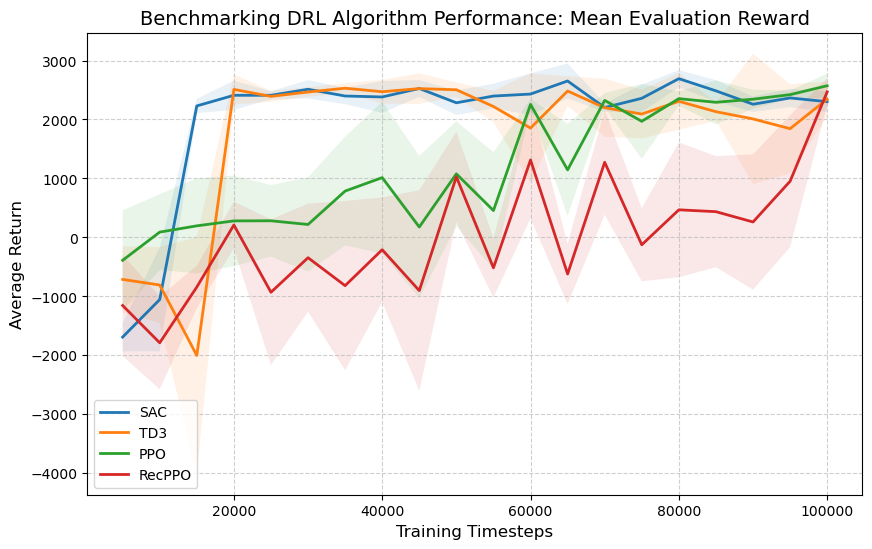

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_eval_comparison(eval_folders):
    plt.figure(figsize=(10, 6))
    
    for label, folder in eval_folders.items():
        # Correct path based on your training script
        npz_path = os.path.join(folder, "evaluations.npz")
        
        if os.path.exists(npz_path):
            data = np.load(npz_path)
            # x = timesteps, y = results (rewards)
            timesteps = data['timesteps']
            results = data['results']
            
            # results is usually (num_evaluations, num_episodes_per_eval)
            mean_rewards = np.mean(results, axis=1)
            std_rewards = np.std(results, axis=1)
            
            # Plot with shaded error bars for a professional paper look
            plt.plot(timesteps, mean_rewards, label=f"{label}", linewidth=2)
            plt.fill_between(timesteps, mean_rewards - std_rewards, 
                             mean_rewards + std_rewards, alpha=0.1)
        else:
            print(f"Skipping {label}: File not found at {npz_path}")

    plt.title("Benchmarking DRL Algorithm Performance: Mean Evaluation Reward", fontsize=14)
    plt.xlabel("Training Timesteps", fontsize=12)
    plt.ylabel("Average Return", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# --- Updated Paths to match your "base_path" logic ---
eval_folders = {
    "SAC": "./experiments/sac/eval_results/",
    "TD3": "./experiments/td3/eval_results/",
    "PPO": "./experiments/ppo/eval_results/",
    "RecPPO": "./experiments/rec_ppo/eval_results/"
}

plot_eval_comparison(eval_folders)

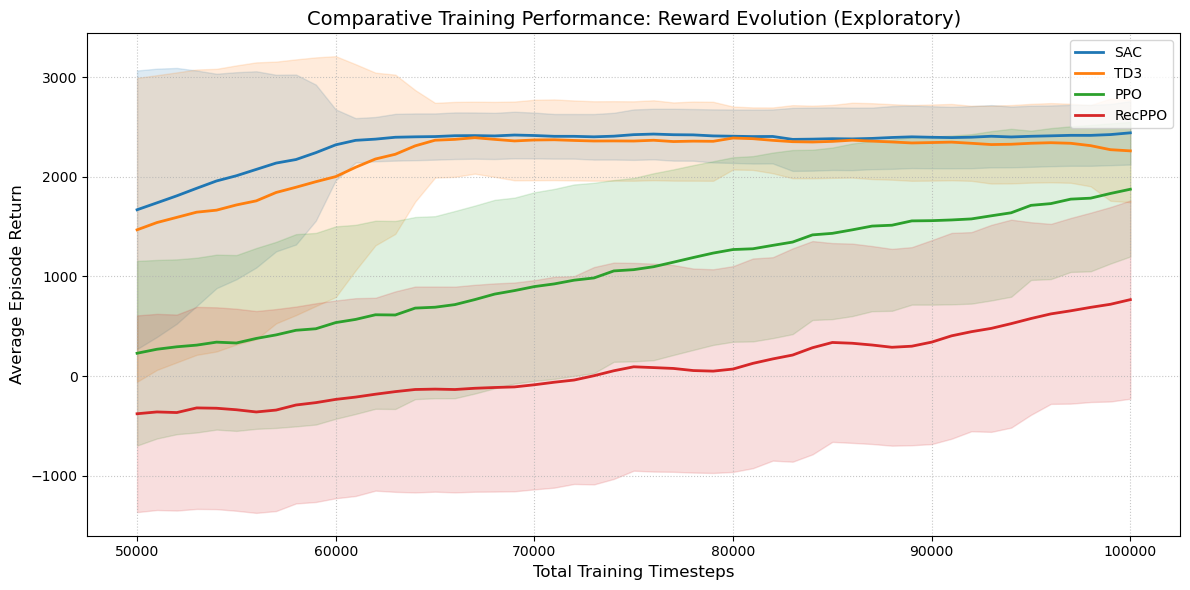

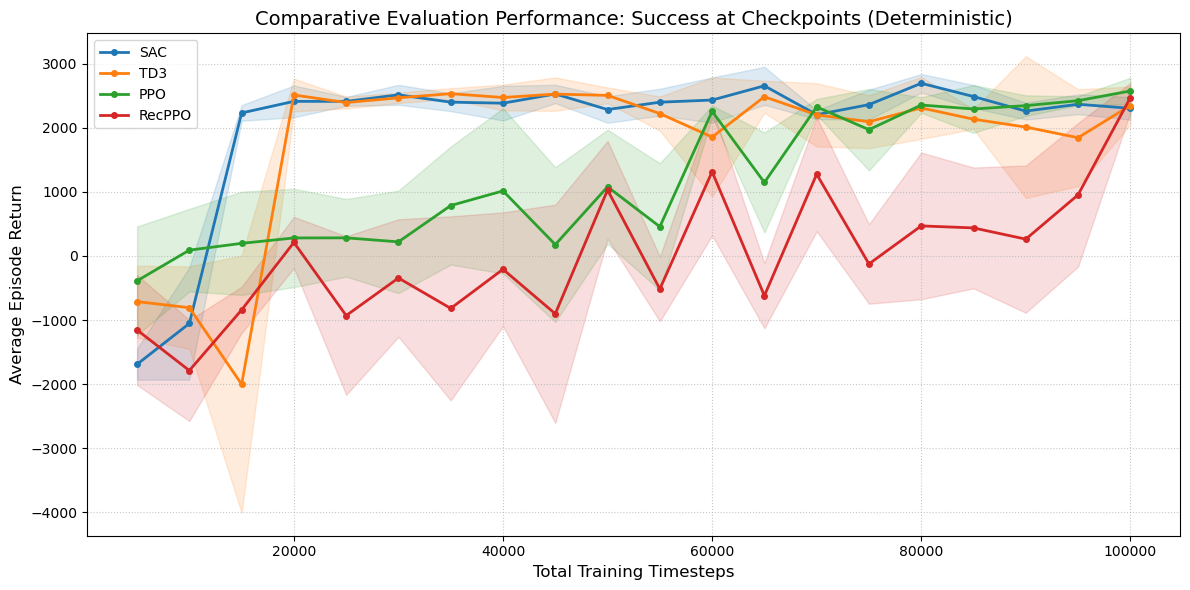

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Common Styling Constants for the Paper ---
TITLE_SIZE = 14
LABEL_SIZE = 12
GRID_STYLE = {'linestyle': ':', 'alpha': 0.7}

def plot_training_comparison(log_folders, window=50):
    """Plots training progress using a Moving Average of exploration episodes."""
    plt.figure(figsize=(12, 6))
    
    for label, folder in log_folders.items():
        # Adjust filename if yours is specifically 'training_logs.monitor.csv'
        monitor_path = os.path.join(folder, "training_logs.monitor.csv")
        
        if os.path.exists(monitor_path):
            df = pd.read_csv(monitor_path, skiprows=1)
            rewards = df['r'].to_numpy()
            cumulative_steps = np.cumsum(df['l'].to_numpy())
            
            if len(rewards) >= window:
                # Calculate Moving Average
                y_mean = np.convolve(rewards, np.ones(window)/window, mode='valid')
                # Calculate Moving Standard Deviation
                y_std = pd.Series(rewards).rolling(window=window).std().to_numpy()[window-1:]
                x_axis = cumulative_steps[window-1:]
                
                line = plt.plot(x_axis, y_mean, label=label, linewidth=2)
                plt.fill_between(x_axis, y_mean - y_std, y_mean + y_std, 
                                 color=line[0].get_color(), alpha=0.15)
            else:
                plt.plot(cumulative_steps, rewards, label=label)

    plt.title("Comparative Training Performance: Reward Evolution (Exploratory)", fontsize=TITLE_SIZE)
    plt.xlabel("Total Training Timesteps", fontsize=LABEL_SIZE)
    plt.ylabel("Average Episode Return", fontsize=LABEL_SIZE)
    plt.legend(loc='best', frameon=True)
    plt.grid(**GRID_STYLE)
    plt.tight_layout()
    plt.show()

def plot_eval_comparison(eval_folders):
    """Plots deterministic performance using the mean of evaluation checkpoints."""
    plt.figure(figsize=(12, 6))
    
    for label, folder in eval_folders.items():
        npz_path = os.path.join(folder, "evaluations.npz")
        
        if os.path.exists(npz_path):
            data = np.load(npz_path)
            timesteps = data['timesteps']
            results = data['results'] # Shape: (num_evals, num_episodes_per_eval)
            
            # Mean and Std across the specific episodes at each checkpoint
            y_mean = np.mean(results, axis=1)
            y_std = np.std(results, axis=1)
            
            line = plt.plot(timesteps, y_mean, label=label, linewidth=2, marker='o', markersize=4)
            plt.fill_between(timesteps, y_mean - y_std, y_mean + y_std, 
                             color=line[0].get_color(), alpha=0.15)

    plt.title("Comparative Evaluation Performance: Success at Checkpoints (Deterministic)", fontsize=TITLE_SIZE)
    plt.xlabel("Total Training Timesteps", fontsize=LABEL_SIZE)
    plt.ylabel("Average Episode Return", fontsize=LABEL_SIZE)
    plt.legend(loc='best', frameon=True)
    plt.grid(**GRID_STYLE)
    plt.tight_layout()
    plt.show()

# --- Configuration ---
# Note: Ensure these paths point to the FOLDERS containing the files
folders = {
    "SAC": "./experiments/sac/",
    "TD3": "./experiments/td3/",
    "PPO": "./experiments/ppo/",
    "RecPPO": "./experiments/rec_ppo/"
}

eval_folders = {
    "SAC": "./experiments/sac/eval_results/",
    "TD3": "./experiments/td3/eval_results/",
    "PPO": "./experiments/ppo/eval_results/",
    "RecPPO": "./experiments/rec_ppo/eval_results/"
}

# Run Plotters
plot_training_comparison(folders, window=50)
plot_eval_comparison(eval_folders)

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import SAC, PPO, TD3
from sb3_contrib import RecurrentPPO
from matplotlib.animation import FuncAnimation, FFMpegWriter

from asv_glider_bearing_dist_env import AsvGliderBearingEnv


# ============================================================
# CONFIG
# ============================================================

# Folder structure: ./experiments/{algo}/best_model/best_model.zip
models = {
    "SAC": (SAC, "./experiments/sac/best_model/best_model.zip"),
    "TD3": (TD3, "./experiments/td3/best_model/best_model.zip"),
    "PPO": (PPO, "./experiments/ppo/best_model/best_model.zip"),
    "RecPPO": (RecurrentPPO, "./experiments/rec_ppo/best_model/best_model.zip"),
}

common_seed = 99

# Video settings
fps = 30
bitrate = 1800
output_dir = "./videos"
os.makedirs(output_dir, exist_ok=True)

# Make one MP4 per model? (True) or only one model? (False)
save_all_models = True

# If save_all_models is False, pick which one:
name_to_video = "SAC"


# ============================================================
# 1) RUN EVALUATION ONCE PER MODEL AND STORE TRAJECTORIES
# ============================================================

test_env = AsvGliderBearingEnv()

trajectories = {}  # name -> {"asv": (T,2), "glider": (T,2)}

for name, (algo_class, path) in models.items():
    if not os.path.exists(path):
        print(f"Skipping {name}: Path not found at {path}")
        continue

    print(f"Loading {name} from {path}")
    model = algo_class.load(path)

    obs, _ = test_env.reset(seed=common_seed)

    asv_history = []
    glider_history = []

    done = False
    lstm_states = None  # used by RecurrentPPO, harmless for others

    while not done:
        # Predict action
        action, lstm_states = model.predict(obs, state=lstm_states, deterministic=True)

        # Step
        obs, _, terminated, truncated, _ = test_env.step(action)
        done = terminated or truncated

        # Log positions
        asv_history.append(test_env.unwrapped.asv_pos.copy())
        glider_history.append(test_env.unwrapped.glider_pos.copy())

    trajectories[name] = {
        "asv": np.array(asv_history),
        "glider": np.array(glider_history),
    }

if not trajectories:
    raise RuntimeError("No trajectories collected. Check model paths / experiment folders.")


# ============================================================
# 2) ANIMATION FUNCTION (SAVES MP4 USING FFMPEG)
# ============================================================

def save_trajectory_mp4(name, asv, glider, out_path, fps=30, bitrate=1800):
    """
    Saves an MP4 video of ASV and Glider trajectories.

    Requires ffmpeg installed and discoverable by matplotlib.
    """

    # Figure + axes
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(f"ASV vs Glider — {name}")
    ax.set_xlabel("X-Coordinate (m)")
    ax.set_ylabel("Y-Coordinate (m)")
    ax.grid(True, linestyle=":", alpha=0.7)
    ax.set_aspect("equal", adjustable="box")

    # Set stable limits with padding (prevents camera from resizing each frame)
    all_xy = np.vstack([asv, glider])
    pad = 10.0
    ax.set_xlim(all_xy[:, 0].min() - pad, all_xy[:, 0].max() + pad)
    ax.set_ylim(all_xy[:, 1].min() - pad, all_xy[:, 1].max() + pad)

    # Plot full glider path as context (static)
    ax.plot(glider[:, 0], glider[:, 1], "k--", alpha=0.35, label="Glider path")

    # ---- Animated elements ----
    # ASV path line (matplotlib will auto-pick a color)
    (asv_line,) = ax.plot([], [], linewidth=2, label="ASV path")
    asv_color = asv_line.get_color()

    # Current ASV position dot (SAME color as line)
    asv_dot = ax.scatter(
        [], [],
        s=70,
        marker="o",
        color=asv_color,
        edgecolors="black",
        linewidths=0.6,
        zorder=5
    )

    # Current Glider position dot (keep black for contrast)
    glider_dot = ax.scatter(
        [], [],
        s=70,
        marker="o",
        color="black",
        edgecolors="black",
        linewidths=0.6,
        zorder=5
    )

    # ---- Start/End markers (static) ----
    # ASV start/end (SAME color as ASV line)
    ax.scatter(
        asv[0, 0], asv[0, 1],
        marker="o", s=120,
        color=asv_color,
        edgecolors="black",
        linewidths=0.8,
        zorder=6
    )
    ax.scatter(
        asv[-1, 0], asv[-1, 1],
        marker="x", s=140,
        color=asv_color,
        linewidths=2.5,
        zorder=6
    )

    # Glider start/end (black)
    ax.scatter(glider[0, 0], glider[0, 1], color="black", marker="o", s=120, zorder=6)
    ax.scatter(glider[-1, 0], glider[-1, 1], color="black", marker="x", s=140, linewidths=2.5, zorder=6)

    ax.legend(loc="upper left", frameon=True, shadow=True)

    # If arrays have different length (shouldn't with same seed, but safe):
    T = min(len(asv), len(glider))

    def init():
        asv_line.set_data([], [])
        asv_dot.set_offsets(np.empty((0, 2)))
        glider_dot.set_offsets(np.empty((0, 2)))
        return asv_line, asv_dot, glider_dot

    def update(frame):
        # Path up to current frame
        asv_line.set_data(asv[: frame + 1, 0], asv[: frame + 1, 1])
        # Current positions
        asv_dot.set_offsets(asv[frame])
        glider_dot.set_offsets(glider[frame])
        return asv_line, asv_dot, glider_dot

    anim = FuncAnimation(fig, update, frames=T, init_func=init, blit=True)

    writer = FFMpegWriter(fps=fps, bitrate=bitrate)
    anim.save(out_path, writer=writer)

    plt.close(fig)
    print(f"Saved MP4: {out_path}")


# ============================================================
# 3) SAVE VIDEOS
# ============================================================

if save_all_models:
    for name, data in trajectories.items():
        out_path = os.path.join(output_dir, f"trajectory_{name}.mp4")
        save_trajectory_mp4(name, data["asv"], data["glider"], out_path, fps=fps, bitrate=bitrate)
else:
    if name_to_video not in trajectories:
        name_to_video = list(trajectories.keys())[0]
        print(f"Requested model not found; using first available: {name_to_video}")

    data = trajectories[name_to_video]
    out_path = os.path.join(output_dir, f"trajectory_{name_to_video}.mp4")
    save_trajectory_mp4(name_to_video, data["asv"], data["glider"], out_path, fps=fps, bitrate=bitrate)

print("Done.")


Loading SAC from ./experiments/sac/best_model/best_model.zip
Loading TD3 from ./experiments/td3/best_model/best_model.zip
Loading PPO from ./experiments/ppo/best_model/best_model.zip


/home/svillhauer/.local/lib/python3.10/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Loading RecPPO from ./experiments/rec_ppo/best_model/best_model.zip
Saved MP4: ./videos/trajectory_SAC.mp4
Saved MP4: ./videos/trajectory_TD3.mp4
Saved MP4: ./videos/trajectory_PPO.mp4
Saved MP4: ./videos/trajectory_RecPPO.mp4
Done.


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import SAC, PPO, TD3
from sb3_contrib import RecurrentPPO
from matplotlib.animation import FuncAnimation, FFMpegWriter

from asv_glider_bearing_dist_env import AsvGliderBearingEnv


# ============================================================
# CONFIG
# ============================================================

models = {
    "SAC": (SAC, "./experiments/sac/best_model/best_model.zip"),
    "TD3": (TD3, "./experiments/td3/best_model/best_model.zip"),
    "PPO": (PPO, "./experiments/ppo/best_model/best_model.zip"),
    "RecPPO": (RecurrentPPO, "./experiments/rec_ppo/best_model/best_model.zip"),
}

common_seed = 99

# Video settings
fps = 30
bitrate = 2200
output_dir = "./videos"
os.makedirs(output_dir, exist_ok=True)
out_path = os.path.join(output_dir, "trajectory_comparison_all_models.mp4")

# If episodes are different lengths:
length_mode = "pad"  # "truncate" or "pad"


# ============================================================
# 1) COLLECT TRAJECTORIES FOR EACH MODEL
# ============================================================

test_env = AsvGliderBearingEnv()
trajectories = {}  # name -> {"asv": (T,2), "glider": (T,2)}

for name, (algo_class, path) in models.items():
    if not os.path.exists(path):
        print(f"Skipping {name}: Path not found at {path}")
        continue

    print(f"Loading {name} from {path}")
    model = algo_class.load(path)

    obs, _ = test_env.reset(seed=common_seed)

    asv_history = []
    glider_history = []

    done = False
    lstm_states = None

    while not done:
        action, lstm_states = model.predict(obs, state=lstm_states, deterministic=True)
        obs, _, terminated, truncated, _ = test_env.step(action)
        done = terminated or truncated

        asv_history.append(test_env.unwrapped.asv_pos.copy())
        glider_history.append(test_env.unwrapped.glider_pos.copy())

    trajectories[name] = {
        "asv": np.array(asv_history, dtype=float),
        "glider": np.array(glider_history, dtype=float),
    }

if not trajectories:
    raise RuntimeError("No trajectories collected. Check model paths / experiment folders.")

# Glider should be the same across agents for the same seed; use the first
first_key = next(iter(trajectories.keys()))
glider = trajectories[first_key]["glider"]

lengths = {k: v["asv"].shape[0] for k, v in trajectories.items()}
min_T = min(lengths.values())
max_T = max(lengths.values())
T = max_T if length_mode == "pad" else min_T


# ============================================================
# 2) SET UP FIGURE (ONE PLOT, ALL LINES + DOTS + MOVING GLIDER)
# ============================================================

fig, ax = plt.subplots(figsize=(9, 9))
ax.set_title("Comparative Analysis of DRL Algorithms for Target Tracking", fontsize=14, fontweight="bold")
ax.set_xlabel("X-Coordinate (m)", fontsize=12)
ax.set_ylabel("Y-Coordinate (m)", fontsize=12)
ax.grid(True, linestyle=":", alpha=0.7)
ax.set_aspect("equal", adjustable="box")

# Axis limits based on ALL trajectories + glider
all_xy = [glider]
for data in trajectories.values():
    all_xy.append(data["asv"])
all_xy = np.vstack(all_xy)

pad = 10.0
ax.set_xlim(all_xy[:, 0].min() - pad, all_xy[:, 0].max() + pad)
ax.set_ylim(all_xy[:, 1].min() - pad, all_xy[:, 1].max() + pad)

# Static glider path
ax.plot(glider[:, 0], glider[:, 1], "k--", alpha=0.35, label="Glider (Target) path")

# Moving glider dot (this is what you were missing)
glider_dot = ax.scatter([], [], s=80, marker="o", color="black",
                        edgecolors="black", linewidths=0.6, zorder=10)

# Glider start/end (static markers)
ax.scatter(glider[0, 0], glider[0, 1], color="black", marker="o", s=110, zorder=9)
ax.scatter(glider[-1, 0], glider[-1, 1], color="black", marker="x", s=130, linewidths=2.5, zorder=9)

# One line + one moving dot per model
lines = {}
dots = {}

for name in trajectories.keys():
    (line,) = ax.plot([], [], linewidth=2, label=f"ASV ({name})")  # auto color
    c = line.get_color()
    lines[name] = line
    dots[name] = ax.scatter([], [], s=70, marker="o", color=c,
                            edgecolors="black", linewidths=0.6, zorder=8)

# Legend: keep glider first
handles, labels = ax.get_legend_handles_labels()

# Keep glider first
try:
    gi = labels.index("Glider (Target) path")
    g_h = handles.pop(gi)
    g_l = labels.pop(gi)
    handles.insert(0, g_h)
    labels.insert(0, g_l)
except ValueError:
    pass

# Put legend OUTSIDE the axes
ax.legend(
    handles,
    labels,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),   # push to the right of plot
    frameon=True,
    shadow=True,
    borderaxespad=0.8
)

# Make room on the right so it doesn't get cut off in video
plt.tight_layout(rect=[0, 0, 0.82, 1])



# ============================================================
# 3) ANIMATION
# ============================================================

def get_pos(arr, frame):
    """Return position at frame; if padded mode and frame exceeds length, hold last."""
    if frame < len(arr):
        return arr[frame]
    return arr[-1]

def init():
    for name in trajectories.keys():
        lines[name].set_data([], [])
        dots[name].set_offsets(np.empty((0, 2)))
    glider_dot.set_offsets(np.empty((0, 2)))
    return [glider_dot] + list(lines.values()) + list(dots.values())

def update(frame):
    # Update glider (move it!)
    glider_dot.set_offsets(get_pos(glider, frame))

    # Update each ASV
    for name, data in trajectories.items():
        asv = data["asv"]

        if length_mode == "truncate":
            # frame guaranteed < min_T
            lines[name].set_data(asv[: frame + 1, 0], asv[: frame + 1, 1])
            dots[name].set_offsets(asv[frame])
        else:
            # pad mode: draw what exists, then hold last point
            end = min(frame + 1, len(asv))
            lines[name].set_data(asv[:end, 0], asv[:end, 1])
            dots[name].set_offsets(get_pos(asv, frame))

    return [glider_dot] + list(lines.values()) + list(dots.values())

anim = FuncAnimation(fig, update, frames=T, init_func=init, blit=True)

writer = FFMpegWriter(fps=fps, bitrate=bitrate)
anim.save(out_path, writer=writer)
plt.close(fig)

print(f"Saved MP4: {out_path}")


Loading SAC from ./experiments/sac/best_model/best_model.zip
Loading TD3 from ./experiments/td3/best_model/best_model.zip
Loading PPO from ./experiments/ppo/best_model/best_model.zip


/home/svillhauer/.local/lib/python3.10/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Loading RecPPO from ./experiments/rec_ppo/best_model/best_model.zip
Saved MP4: ./videos/trajectory_comparison_all_models.mp4
